## Observations and Insights 

In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn import datasets
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data = pd.merge(mouse_metadata, study_results, how = 'left')
combine_data.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [34]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [35]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [36]:
# Checking the number of mice.
mice_number=combine_data["Mouse ID"].nunique()
mice_number

249

In [37]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice=combine_data.loc[combine_data.duplicated(subset = ['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [38]:
boolean=combine_data["Mouse ID"] =='g989'


In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dup_mouseID = pd.DataFrame(duplicate_mice)
all_dup_mouseID


,0
0,g989


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = combine_data[combine_data['Mouse ID'].isin(duplicate_mice)==False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [41]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_data['Mouse ID'].value_counts()
clean_mice_number = len(clean_mice)
clean_mice_number

248

## Summary Statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
dr_reg_mean = clean_data.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
dr_reg_mean


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [50]:
dr_reg_median = clean_data.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
dr_reg_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [51]:
dr_reg_variance = clean_data.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
dr_reg_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [52]:
dr_reg_std = clean_data.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
dr_reg_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [53]:
dr_reg_sem = clean_data.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
dr_reg_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_sta_table =pd.DataFrame({"Mean":dr_reg_mean, "Median":dr_reg_median,"Variance":dr_reg_variance, "Std":dr_reg_std, "SEM":dr_reg_sem })
summary_sta_table


,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [64]:
# Using the aggregation method, produce the same summary statistics in a single line
single_line = clean_data.groupby('Drug Regimen')
aggregate_table = single_line.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
aggregate_table



/var/folders/ln/kt83gzyx0csgmdyxk3116rwh0000gn/T/ipykernel_73650/312754923.py:3: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  aggregate_table = single_line.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [65]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen (using Pandas.)
total_timepoints = combine_data.groupby(["Drug Regimen"]).count()["Timepoint"]
total_timepoints


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

Text(0, 0.5, 'Total Timepoints')

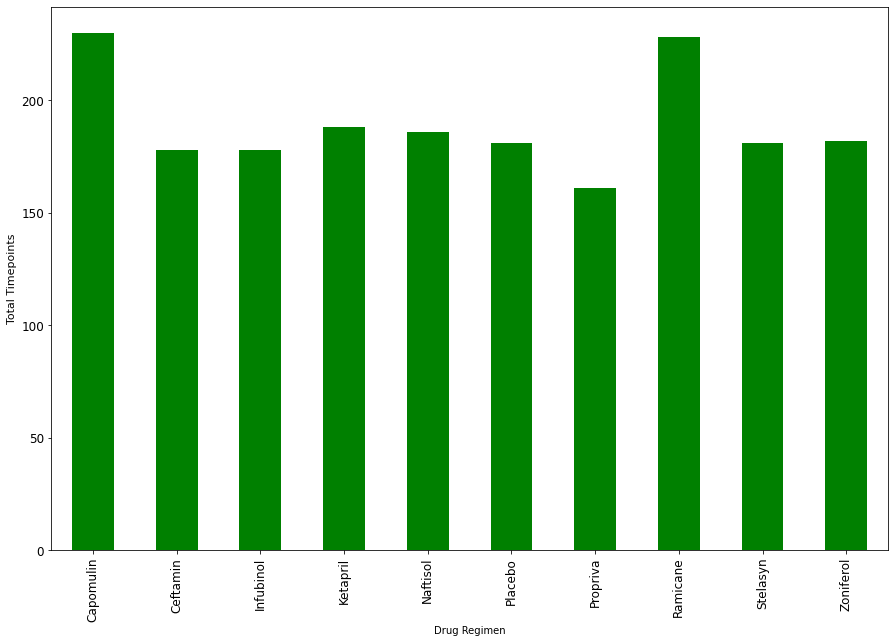

In [175]:
# Bar Plot (Using Pandas): Drug Regimen Vs Total Timepoints
plot_pandas = total_timepoints.plot.bar(figsize = (15,10), color = 'g', fontsize = 12)
plt.ylabel("Total Timepoints", fontsize =11)





In [83]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen (using pyplot.)

tot_tpoints = (combine_data.groupby(["Drug Regimen"])["Timepoint"].count()).tolist() # create an array that contains timepoints
tot_tpoints


[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0, 0.5, 'Total Timepoints')

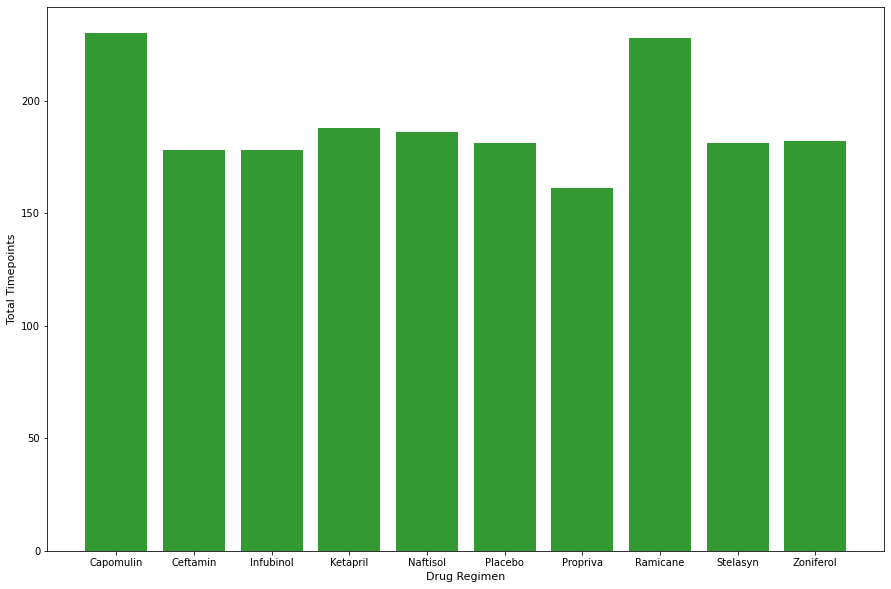

In [180]:
# Bar Plot (Using Pyplot): Drug Regimen Vs Total Timepoints
x_axis = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn','Zoniferol']
figl, axl = plt.subplots(figsize = (15,10))
plt.bar(x_axis, tot_tpoints, color = 'g', alpha =0.8, align = 'center')
tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn','Zoniferol']
plt.xlabel("Drug Regimen", fontsize = 11)
plt.ylabel("Total Timepoints", fontsize = 11)
           
                    

In [127]:
# Generate a pie plot showing the distribution of female versus male mice (using Pandas)

#groupby gender
groupby_gender = combine_data.groupby(["Mouse ID", "Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

#Create a dataframe with Total count of Female and Male Mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"] # column field Total count

#Create and Format the percentage of Female vs Male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"] # assign variable to label

# gender_df
mouse_gender









,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


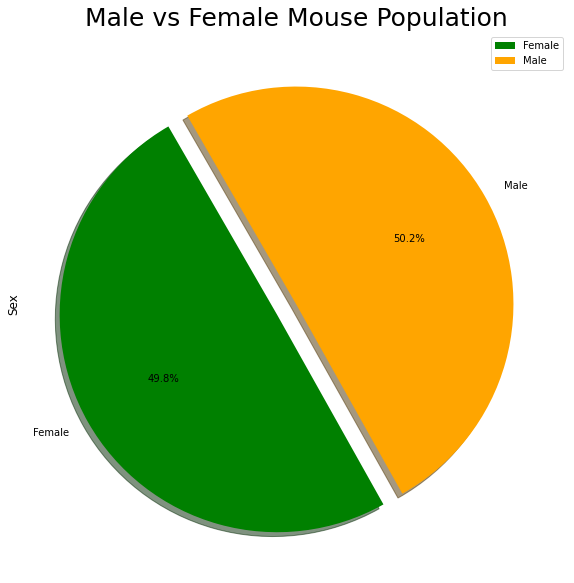

In [171]:
#Generate Pie Plot showing the distribution of Female Vs Male Mice (Using Pandas)
colors = ['green', 'orange']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(15,10), colors = colors, startangle=120, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 25)
plt.ylabel('Sex',fontsize = 12)
plt.show()

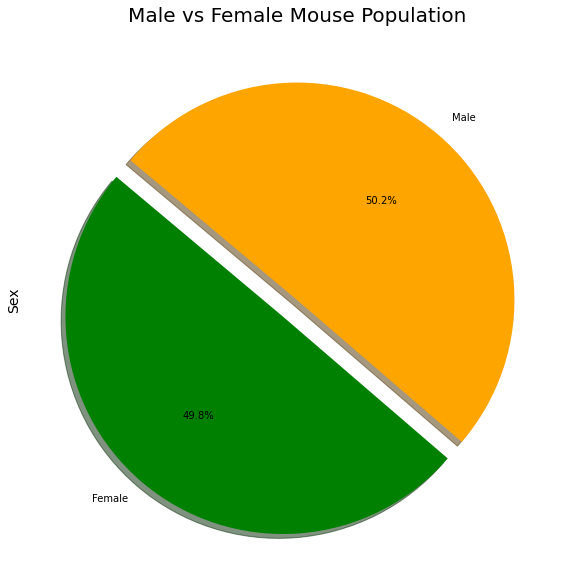

In [170]:
# Generate a pie plot showing the distribution of female versus male mice using PyPlot

#Create Lables for Pie diagram
labels = ["Female", "Male"]

#List the values of each section of Pie diagram
sizes = [49.799197,50.200803]

#set Colors
colors = ['green', 'orange']

#Which section to detach in the circle pie
explode = (0.1,0)

#Create the pie diagram based on the values
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
plt.show()





## Quartiles, Outliers and Boxplots

In [147]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Create df to locate Drug Regimen if it is equal to the given treatment regimens
Capomulin_df = combine_data.loc[combine_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df  = combine_data.loc[combine_data["Drug Regimen"] == "Ramicane",:]
Infubinol_df = combine_data.loc[combine_data["Drug Regimen"] == "Infubinol",:]
Ceftamin_df  = combine_data.loc[combine_data["Drug Regimen"] == "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse
#Capomulin Drug
Capomulin_lt   = Capomulin_df.groupby("Mouse ID").max()['Timepoint']
Capomulin_vol  = pd.DataFrame(Capomulin_lt)
Capomulin_merge= pd.merge(Capomulin_vol, combine_data, on = ("Mouse ID", "Timepoint"), how = "left")
Capomulin_merge.head(12)




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [148]:
# Determine outliers using upper and lower bounds
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Capomulin Quartiles and IQR
#Determine Outliers using upper and lower bounds

Capomulin_tumors_mice = Capomulin_merge["Tumor Volume (mm3)"] 
quartiles = Capomulin_tumors_mice.quantile([.25,.5,.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
IQR = upper_q -lower_q

print(f"The lower quartile of Capomulin tumors: {lower_q}")
print(f"The upper quartile of Capomulin tumors: {upper_q}")
print(f"The Interquartile of Capomulin tumors: {IQR}")
print(f"The median of Capomulin tumors: {quartiles[0.5]}")

lower_bound = lower_q -(1.5*IQR)
upper_bound = upper_q +(1.5*IQR)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The Interquartile of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [149]:
# Start by getting the last (greatest) timepoint for each mouse

#Ramicane Drug
Ramicane_lt   = Ramicane_df.groupby("Mouse ID").max()['Timepoint']
Ramicane_vol  = pd.DataFrame(Ramicane_lt)
Ramicane_merge= pd.merge(Ramicane_vol, combine_data, on = ("Mouse ID", "Timepoint"), how = "left")
Ramicane_merge.head(12)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [150]:
#Ramicane Quartiles and IQR
#Determine Outliers using upper and lower bounds

Ramicane_tumors_mice = Ramicane_merge["Tumor Volume (mm3)"] 
quartiles = Ramicane_tumors_mice.quantile([.25,.5,.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
IQR = upper_q -lower_q

print(f"The lower quartile of Ramicane tumors: {lower_q}")
print(f"The upper quartile of Ramicane tumors: {upper_q}")
print(f"The Interquartile of Ramicane tumors: {IQR}")
print(f"The median of Ramicane tumors: {quartiles[0.5]}")

lower_bound = lower_q -(1.5*IQR)
upper_bound = upper_q +(1.5*IQR)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The Interquartile of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [151]:
# Start by getting the last (greatest) timepoint for each mouse

#Infubinol Drug
Infubinol_lt   = Infubinol_df.groupby("Mouse ID").max()['Timepoint']
Infubinol_vol  = pd.DataFrame(Infubinol_lt)
Infubinol_merge= pd.merge(Infubinol_vol, combine_data, on = ("Mouse ID", "Timepoint"), how = "left")
Infubinol_merge.head(12)




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [152]:
# Infubinol Quartiles and IQR
#Determine Outliers using upper and lower bounds

Infubinol_tumors_mice = Infubinol_merge["Tumor Volume (mm3)"] 
quartiles = Infubinol_tumors_mice.quantile([.25,.5,.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
IQR = upper_q -lower_q

print(f"The lower quartile of Infubinol tumors: {lower_q}")
print(f"The upper quartile of Infubinoltumors: {upper_q}")
print(f"The Interquartile of Infubinol tumors: {IQR}")
print(f"The median of Infubinol tumors: {quartiles[0.5]}")

lower_bound = lower_q -(1.5*IQR)
upper_bound = upper_q +(1.5*IQR)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinoltumors: 65.52574285
The Interquartile of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [153]:
# Start by getting the last (greatest) timepoint for each mouse

# Ceftamin Drug
Ceftamin_lt   = Ceftamin_df.groupby("Mouse ID").max()['Timepoint']
Ceftamin_vol  = pd.DataFrame(Ceftamin_lt)
Ceftamin_merge= pd.merge(Ceftamin_vol, combine_data, on = ("Mouse ID", "Timepoint"), how = "left")
Ceftamin_merge.head(12)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [154]:
# Ceftamin Quartiles and IQR
#Determine Outliers using upper and lower bounds

Ceftamin_tumors_mice = Ceftamin_merge["Tumor Volume (mm3)"] 
quartiles = Ceftamin_tumors_mice.quantile([.25,.5,.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
IQR = upper_q -lower_q

print(f"The lower quartile of Ceftamin tumors: {lower_q}")
print(f"The upper quartile of Ceftamin tumors: {upper_q}")
print(f"The Interquartile of Ceftamin tumors: {IQR}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]}")

lower_bound = lower_q -(1.5*IQR)
upper_bound = upper_q +(1.5*IQR)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")




The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The Interquartile of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


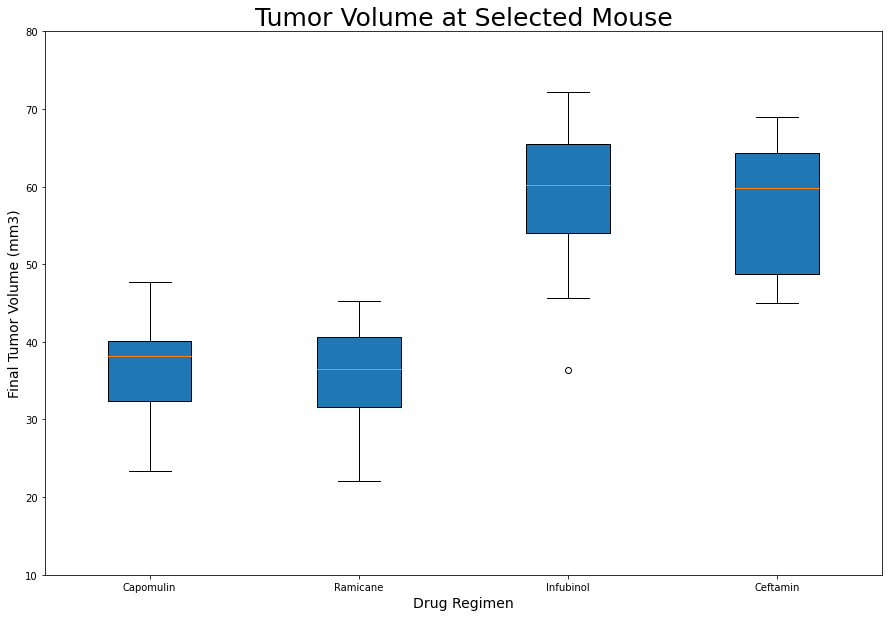

In [155]:
# Put treatments into a list for for loop (and later for plot labels)
plotting_data = [Capomulin_tumors_mice,Ramicane_tumors_mice,Infubinol_tumors_mice,Ceftamin_tumors_mice]
# Create empty list to fill with tumor vol data (for plotting)
Regimen = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(plotting_data, labels=Regimen, widths = 0.4, patch_artist=True, vert=True)
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.ylim(10, 80)
plt.show()


    
    

    
    

## Line and Scatter Plots

In [156]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "i738", :]
line_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
195,i738,Capomulin,Female,23,20,0,45.000000,0
196,i738,Capomulin,Female,23,20,5,45.595685,0
197,i738,Capomulin,Female,23,20,10,43.421014,0
198,i738,Capomulin,Female,23,20,15,37.978778,0
199,i738,Capomulin,Female,23,20,20,38.531136,0


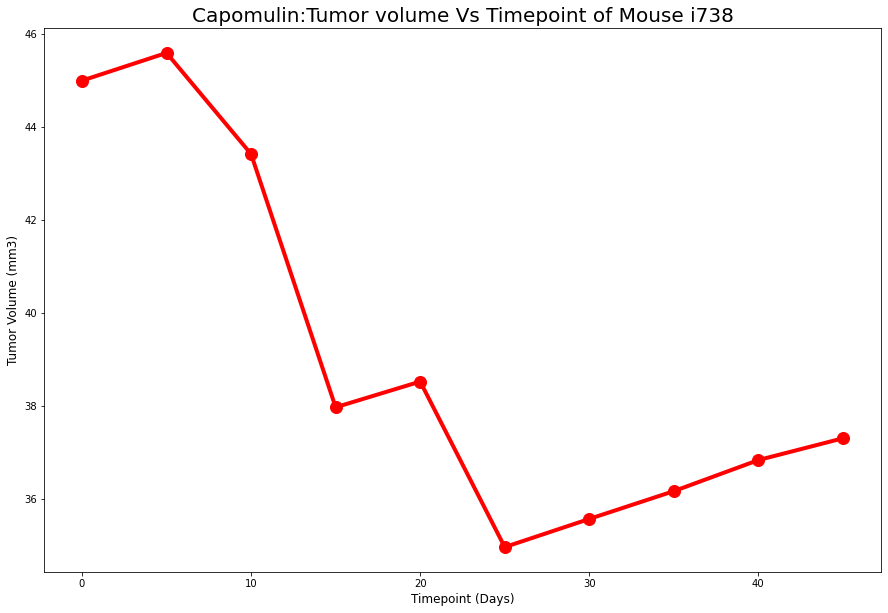

In [169]:
x_axis = line_df["Timepoint"]
tumor_size = line_df["Tumor Volume (mm3)"]

figl, axl = plt.subplots(figsize =(15,10))
plt.title('Capomulin:Tumor volume Vs Timepoint of Mouse i738', fontsize =20)
plt.plot(x_axis, tumor_size,linewidth = 4, markersize = 12, marker = 'o', color = "red", label = "Fahreneit")
plt.xlabel('Timepoint (Days)', fontsize = 12)
plt.ylabel('Tumor Volume (mm3)', fontsize = 12)
plt.show()

In [158]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

scatter_df = Capomulin_df.loc[Capomulin_df["Weight (g)"]]
scatter_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
17,s185,Capomulin,Female,3,17,35,28.328531,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
17,s185,Capomulin,Female,3,17,35,28.328531,1


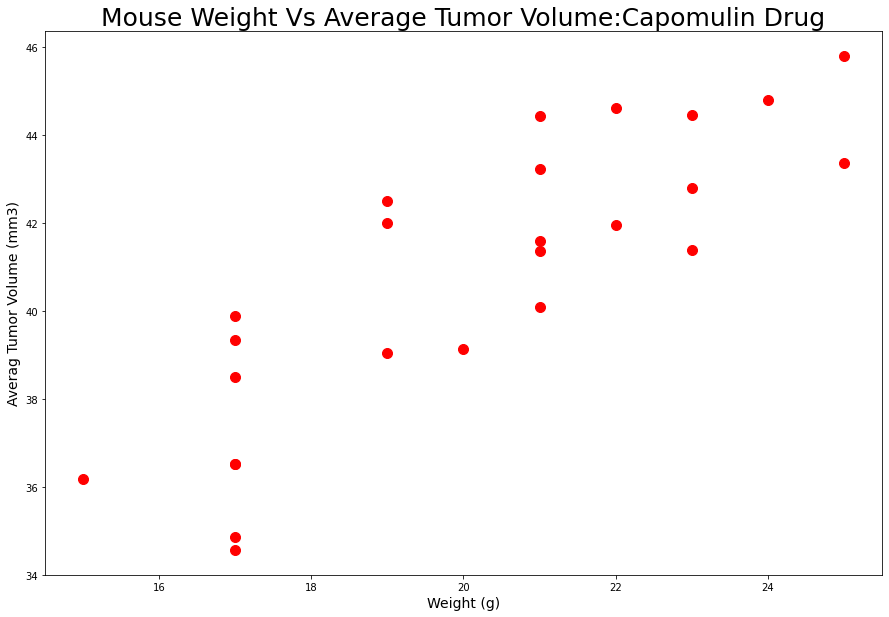

In [176]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_capom_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capom_vol['Weight (g)'],avg_capom_vol['Tumor Volume (mm3)'],s=100, color="red")
plt.title('Mouse Weight Vs Average Tumor Volume:Capomulin Drug',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)
plt.show()

## Correlation and Regression

In [177]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg_capom_vol['Weight (g)'],avg_capom_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")


The correlation between mouse weight and average tumor volume is 0.84


In [178]:
x_values = avg_capom_vol['Weight (g)']
y_values = avg_capom_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241049
intercept:21.552160532685008
rvalue (Correlation coefficient):0.8419363424694721
pandas (Correlation coefficient):0.84
stderr:0.12754359033201323
y = 0.95x + 21.55


The r-squared is: 0.7088568047708723


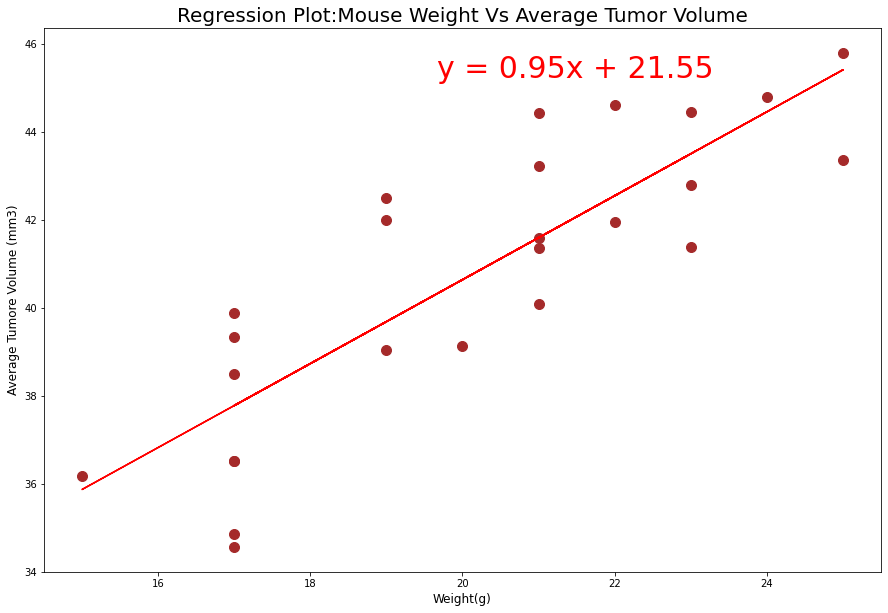

In [179]:
# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=100, color="brown")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot:Mouse Weight Vs Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =12)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =12)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# The above R-Squared value represents smaller difference between the observed data and the fitted data.70% of the model 
#fit the data.